# K-Means Clustering

K-means clustering partitions n observations into k clusters in which each observation belongs to the cluster with the nearest centroid.

This notebook will help you understand k-means clustering on the **clustering.csv** dataset. It has 12 input features and 1 target variable. The features 'ApplicantIncome' and 'LoanAmount' have been chosen and optimum k-value is computed using sum of squares of the distance between datapoints and clusters.


Importing Libraries

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestCentroid
warnings.filterwarnings('ignore')

load dataset

In [10]:
data = pd.read_csv('clustering.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


Select the values of features 'ApplicationIncome' and 'LoanAmount'.

In [16]:
data = data.loc[:, ['ApplicantIncome', 'LoanAmount']]
X_train = data.values

Transform the data into standard normally distributed data so as to improve the estimator performance.

In [13]:
scaler = StandardScaler()
X = scaler.fit_transform(X_train)

Draw the scatterplot of the selected datapoints.

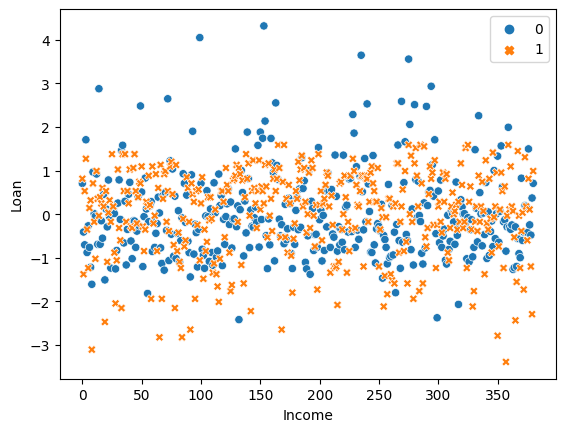

In [14]:
sns.scatterplot(X)
plt.xlabel('Income')
plt.ylabel('Loan')
plt.show()

Using the KMeans function from Sklearn, we create model, with number of clusters = 5. **fit_predict** computes the cluster centers and predict cluster index for each sample. 

In [61]:
kmeans_model = KMeans(n_clusters=5, random_state=0, n_init="auto")
clusters = kmeans_model.fit_predict(X)

Sum of Squares Distance (SSD)


To calculate within cluster sum of squares, the Euclidean distance between a given point and the centroid to which it is assigned, is computed. This process is then iterated for all points in the cluster, and then sum the values for the cluster and divide by the number of points.

The so-called elbow method is a common way to find the ideal number of clusters within a dataset. The elbow point (=the number for K), after which there are no more sudden drops in the line plot (=SSD is not significantly reduced, so there’s no need to add more clusters), is the optimum value of k.

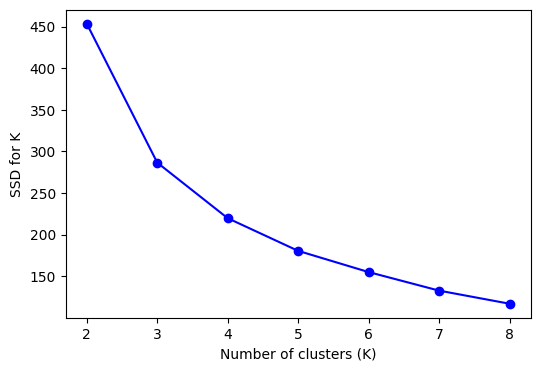

In [68]:
ssd = []
for k in range(2, 9):
    kmeans_model = KMeans(n_clusters=k)
    kmeans_model.fit(X)
    ssd.append(kmeans_model.inertia_)
plt.figure(figsize=(6, 4), dpi=100)
plt.plot(range(2, 9), ssd, color="blue", marker="o")
plt.xlabel("Number of clusters (K)")
plt.ylabel("SSD for K")
plt.show()

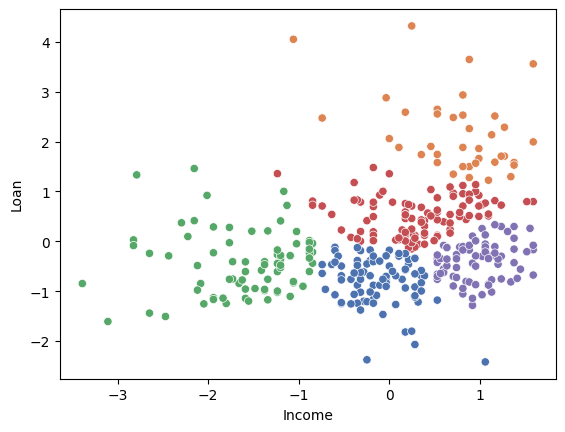

In [69]:
sns.scatterplot(x=X[:,1],
                y=X[:,0],
                hue=clusters,
                palette="deep",
                legend = None
                )
plt.xlabel('Income')
plt.ylabel('Loan')
plt.show()

# References
1. https://medium.com/machine-learning-algorithms-from-scratch/k-means-clustering-from-scratch-in-python-1675d38eee42
2. https://medium.com/nerd-for-tech/k-means-python-implementation-from-scratch-8400f30b8e5c
3. https://towardsdatascience.com/create-your-own-k-means-clustering-algorithm-in-python-d7d4c9077670
4. https://pythonprogramming.net/k-means-from-scratch-machine-learning-tutorial/
5. https://data36.com/k-means-clustering-scikit-learn-python/
6. https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


# TASKS

1. Using kmeans, implement the **Bisecting k-means algorithm** on the same data. 
2. Compare your results with kmeans scatterplots.